## Imports

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Load files from News Articles

In [6]:
path_, filename_, category_, article_or_summary_ = [], [], [], []
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        path_.append(os.path.join(dirname, filename))
        filename_.append(filename)
        category_.append(dirname.split("/")[-1])
        article_or_summary_.append(dirname.split("/")[-2])
df = pd.DataFrame({"path": path_,"filename": filename_, "category": category_,
                   "article_or_summary": article_or_summary_},
                  columns=["path", "filename", "category", "article_or_summary"])

df.head()

,path,filename,category,article_or_summary
0,./data/news articles/entertainment/289.txt,289.txt,entertainment,news articles
1,./data/news articles/entertainment/262.txt,262.txt,entertainment,news articles
2,./data/news articles/entertainment/276.txt,276.txt,entertainment,news articles
3,./data/news articles/entertainment/060.txt,060.txt,entertainment,news articles
4,./data/news articles/entertainment/074.txt,074.txt,entertainment,news articles


## Distribution of categories

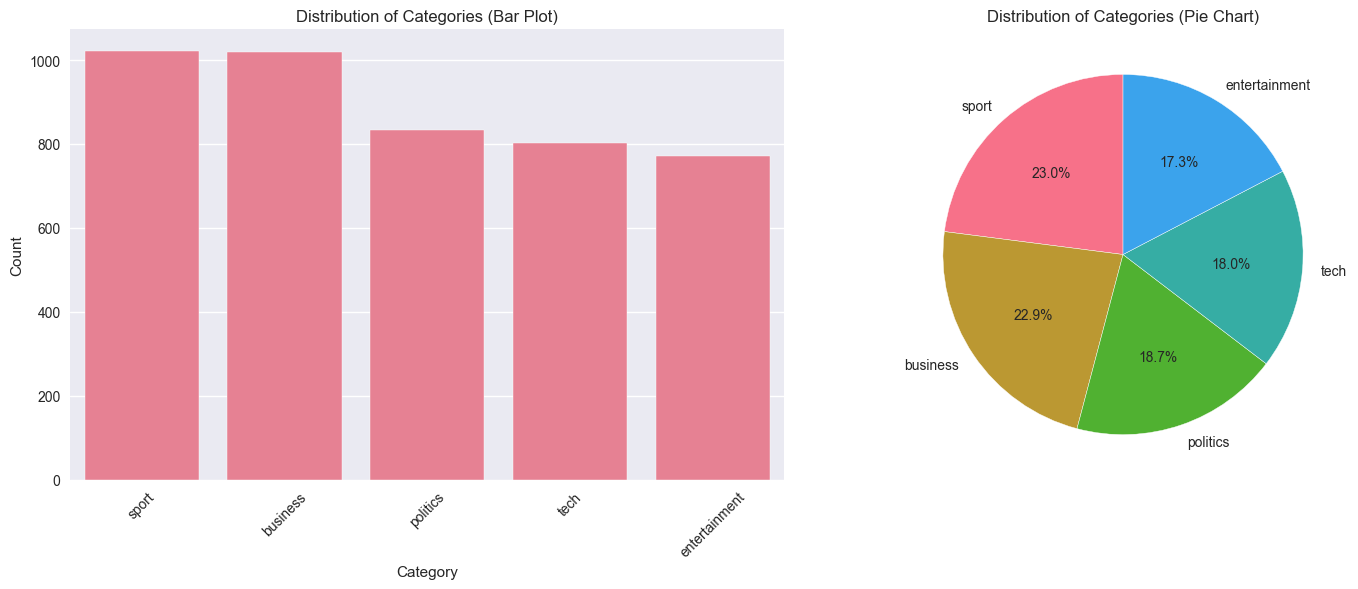

In [7]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Bar Plot
category_counts = df['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax1)
ax1.set_title('Distribution of Categories (Bar Plot)')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')
# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# 2. Pie Chart
plt.sca(ax2)
plt.pie(category_counts.values,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90)
ax2.set_title('Distribution of Categories (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

## Text Analysis


Dataset Overview:
Encoding used for text content: utf-8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4450 entries, 0 to 4449
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   path                4450 non-null   object
 1   filename            4450 non-null   object
 2   category            4450 non-null   object
 3   article_or_summary  4450 non-null   object
 4   content             4450 non-null   object
 5   text_length         4450 non-null   int64 
 6   word_count          4450 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 243.5+ KB
None

Missing values:
path                  0
filename              0
category              0
article_or_summary    0
content               0
text_length           0
word_count            0
dtype: int64


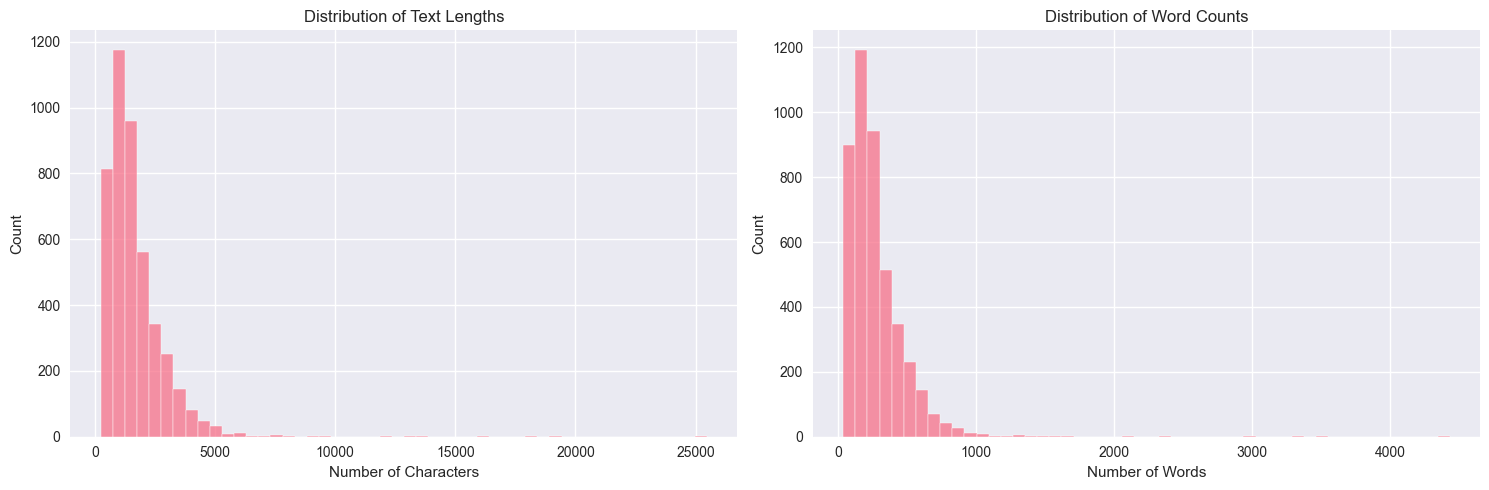

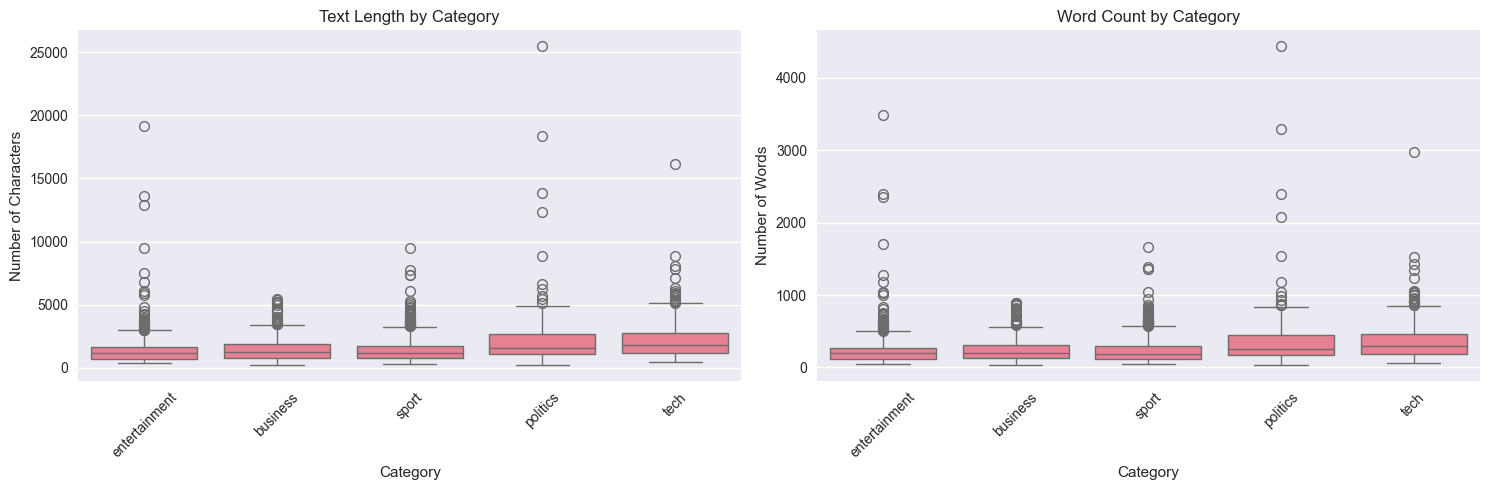

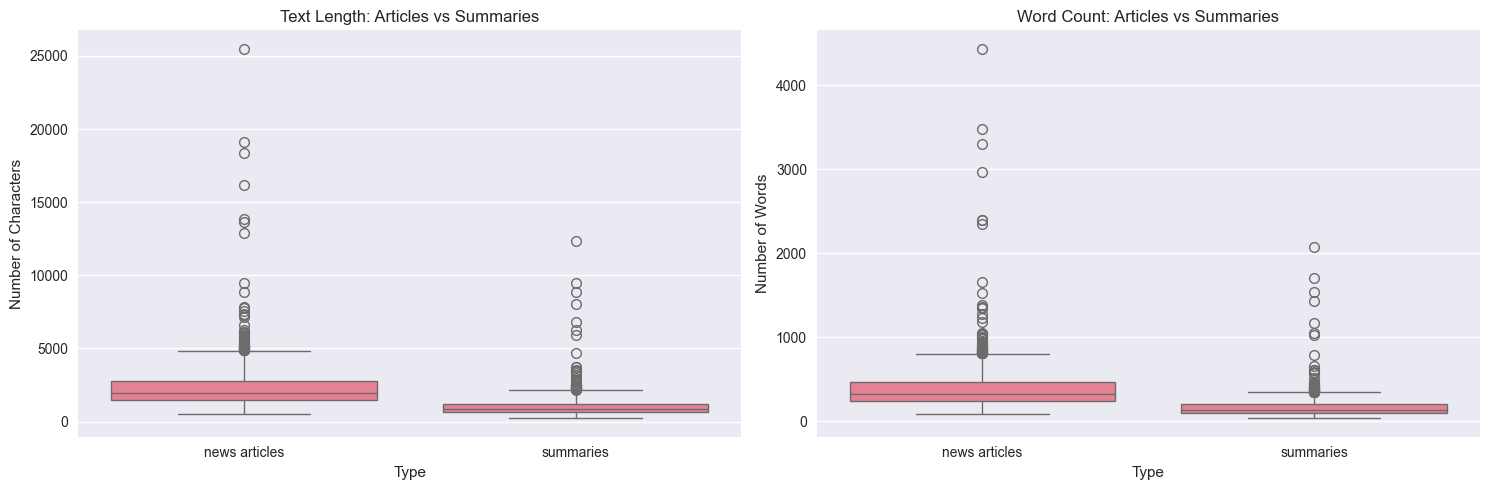


Text Statistics by Category:
              text_length                               word_count          \
                    count     mean      std  min    max       mean     std   
category                                                                     
business             1020  1426.28   844.83  243   5408     234.40  141.17   
entertainment         772  1394.63  1266.47  337  19138     237.34  225.02   
politics              834  1935.35  1538.74  227  25485     324.84  267.27   
sport                1022  1376.51   976.81  247   9473     236.23  171.99   
tech                  802  2137.01  1358.77  404  16160     358.27  236.28   

                         
              min   max  
category                 
business       40   891  
entertainment  54  3482  
politics       38  4432  
sport          42  1662  
tech           65  2969  

Text Statistics by Type:
                   text_length                               word_count  \
                         count     m

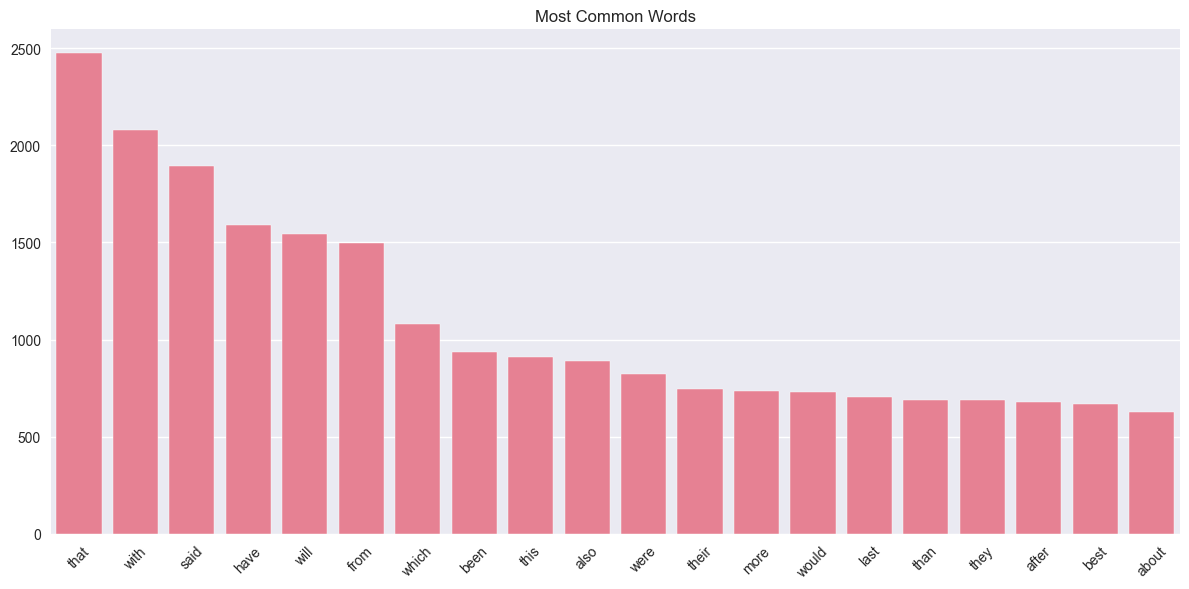


Cross-tabulation of Categories and Article/Summary:
article_or_summary  news articles  summaries
category                                    
business                      510        510
entertainment                 386        386
politics                      417        417
sport                         511        511
tech                          401        401


<Figure size 1200x600 with 0 Axes>

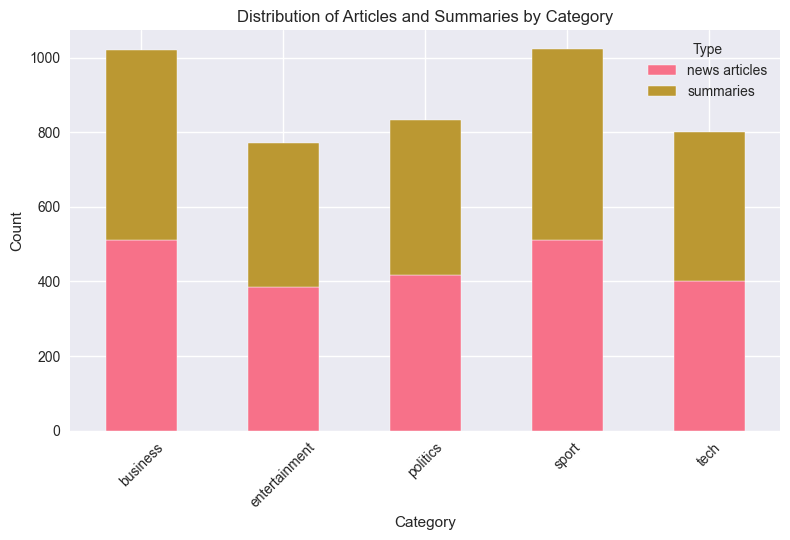

In [8]:
def read_text_file(file_path):
    """
    Try multiple encodings to read the file
    """
    encodings = ['utf-8', 'latin1', 'cp1252', 'iso-8859-1', 'ascii']
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding, errors='replace') as file:
                return file.read(), encoding
        except Exception as e:
            continue
    return None


# Initialize new columns
df['content'] = ''
df['text_length'] = 0
df['word_count'] = 0

# Read files and populate columns
failed_files = []
for idx, row in df.iterrows():
    content, encodingUsed = read_text_file(row['path'])
    if content is not None:
        df.at[idx, 'content'] = content
        df.at[idx, 'text_length'] = len(content)
        df.at[idx, 'word_count'] = len(content.split())
    else:
        failed_files.append(row['path'])

# Print failed files
if failed_files:
    print(f"Failed to read {len(failed_files)} files:")
    for file in failed_files[:5]:
        print(f"- {file}")
    if len(failed_files) > 5:
        print(f"... and {len(failed_files) - 5} more")

print("\nDataset Overview:")
print("================")
print("Encoding used for text content:", encodingUsed)
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

plt.figure(figsize=(15, 5))

# Distribution of text lengths
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['text_length'] > 0], x='text_length', bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Characters')

# Distribution of word counts
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['word_count'] > 0], x='word_count', bins=50)
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')

plt.tight_layout()
plt.show()

# Text length by category
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['text_length'] > 0], x='category', y='text_length')
plt.xticks(rotation=45)
plt.title('Text Length by Category')
plt.xlabel('Category')
plt.ylabel('Number of Characters')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['word_count'] > 0], x='category', y='word_count')
plt.xticks(rotation=45)
plt.title('Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Text length comparison
plt.subplot(1, 2, 1)
sns.boxplot(data=df[df['text_length'] > 0],
            x='article_or_summary',
            y='text_length')
plt.title('Text Length: Articles vs Summaries')
plt.xlabel('Type')
plt.ylabel('Number of Characters')

# Word count comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=df[df['word_count'] > 0],
            x='article_or_summary',
            y='word_count')
plt.title('Word Count: Articles vs Summaries')
plt.xlabel('Type')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()

print("\nText Statistics by Category:")
print("==========================")
stats_by_category = df.groupby('category').agg({
    'text_length': ['count', 'mean', 'std', 'min', 'max'],
    'word_count': ['mean', 'std', 'min', 'max']
}).round(2)
print(stats_by_category)

print("\nText Statistics by Type:")
print("=====================")
stats_by_type = df.groupby('article_or_summary').agg({
    'text_length': ['count', 'mean', 'std', 'min', 'max'],
    'word_count': ['mean', 'std', 'min', 'max']
}).round(2)
print(stats_by_type)

# Get sample of non-empty content
sample_texts = df[df['content'] != '']['content'].head(1000)


# Most common words (simple approach)
def get_common_words(texts, n=20):
    words = []
    for text in texts:
        # Simple word tokenization
        words.extend([word.lower() for word in text.split()
                      if word.isalnum() and len(word) > 3])
    return Counter(words).most_common(n)


common_words = get_common_words(sample_texts)

# Plot most common words
plt.figure(figsize=(12, 6))
words, counts = zip(*common_words)
sns.barplot(x=list(words), y=list(counts))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

summary_stats = {
    'total_files': len(df),
    'successful_reads': len(df[df['text_length'] > 0]),
    'failed_reads': len(failed_files),
    'categories': df['category'].nunique(),
    'avg_length': df[df['text_length'] > 0]['text_length'].mean(),
    'avg_words': df[df['word_count'] > 0]['word_count'].mean()
}

with open('text_analysis_summary.txt', 'w') as f:
    f.write("Text Analysis Summary\n")
    f.write("===================\n\n")
    f.write(f"Total files: {summary_stats['total_files']}\n")
    f.write(f"Successfully read: {summary_stats['successful_reads']}\n")
    f.write(f"Failed to read: {summary_stats['failed_reads']}\n")
    f.write(f"Number of categories: {summary_stats['categories']}\n")
    f.write(f"Average text length: {summary_stats['avg_length']:.2f} characters\n")
    f.write(f"Average word count: {summary_stats['avg_words']:.2f} words\n")

cross_tab = pd.crosstab(df['category'], df['article_or_summary'])
print("\nCross-tabulation of Categories and Article/Summary:")
print(cross_tab)

# Visualize cross-tabulation
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.title('Distribution of Articles and Summaries by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()